# Presentation

In this analysis, the goal was to segment customers based on their purchasing behaviour, using the RFM (Recency, Frequency, and Monetary) methodology. Segmentation allows us to identify groups of customers with similar characteristics, facilitating the creation of personalised marketing strategies and improving retention and engagement.
___

**Methodology** <br>

**RFM Scoring**:

- Recency (R): Measures how much time has passed since the customer's last purchase.

- Frequency (F): Quantifies the number of purchases made by the customer.

- Monetary (M): Evaluates the total amount spent by the customer.

Each metric was scored from 1 to 5, with 1 being the worst performance and 5 being the best.

___ 
**Clustering**:

- Customers were grouped into clusters based on their RFM scores.

- Clustering helps identify behavioural patterns, such as customers who spend a lot but purchase infrequently, or customers who purchase frequently but spend less.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv('BancoDeDados.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [5]:
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [6]:
def plot_perc(st,dados):
    plt.figure(figsize=(20,8))
    
    g = sns.countplot(x= st,data=dados,orient='h')
    g.set_ylabel('Count',fontsize=17)
    
    sizes = []
    
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x() + p.get_width()/1.6,
              height+200,
              '{:1.2f}%'.format(height/116581*100),
              ha = 'center',va='bottom',fontsize=12)
        
    g.set_ylim(0,max(sizes)*1.1)

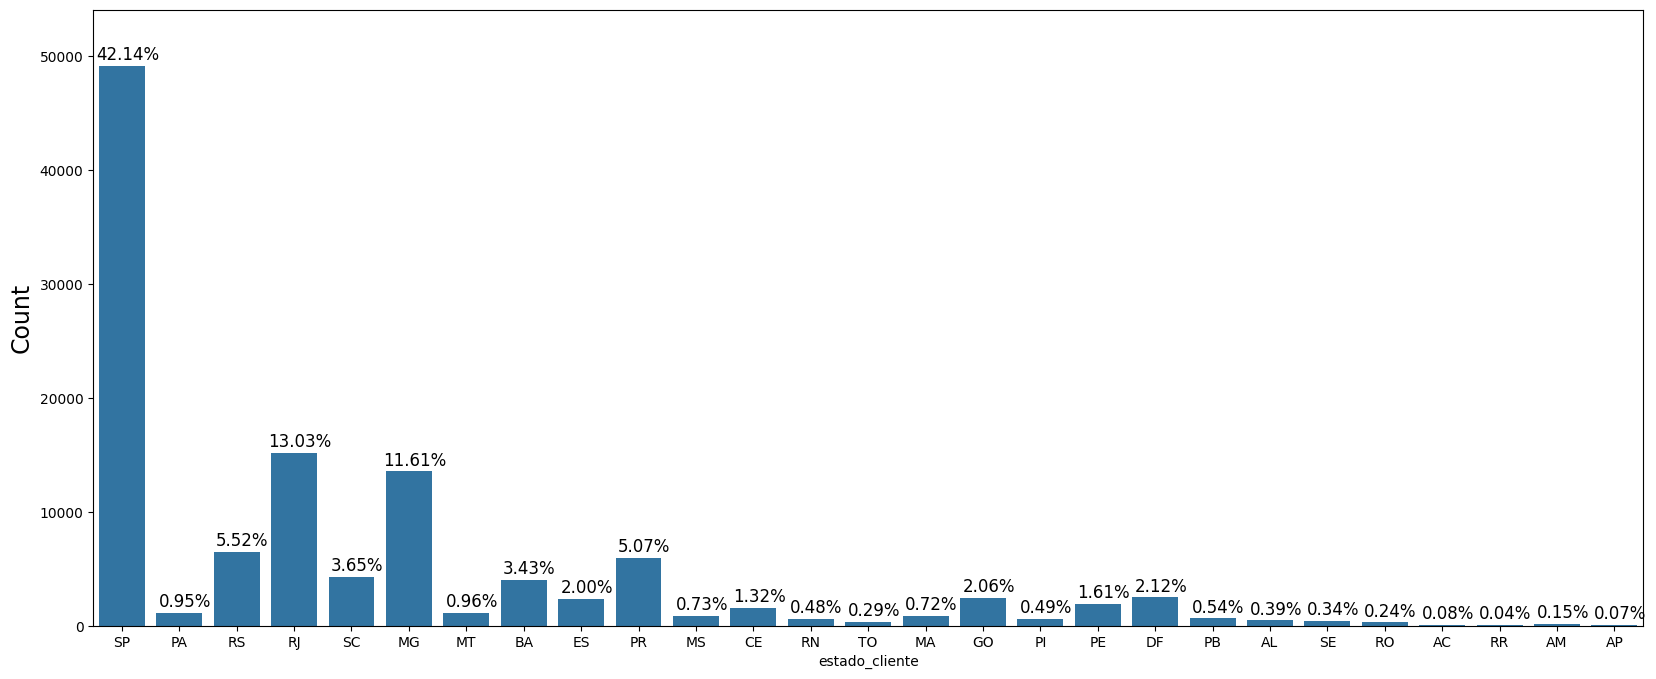

In [7]:
plot_perc('estado_cliente',df)

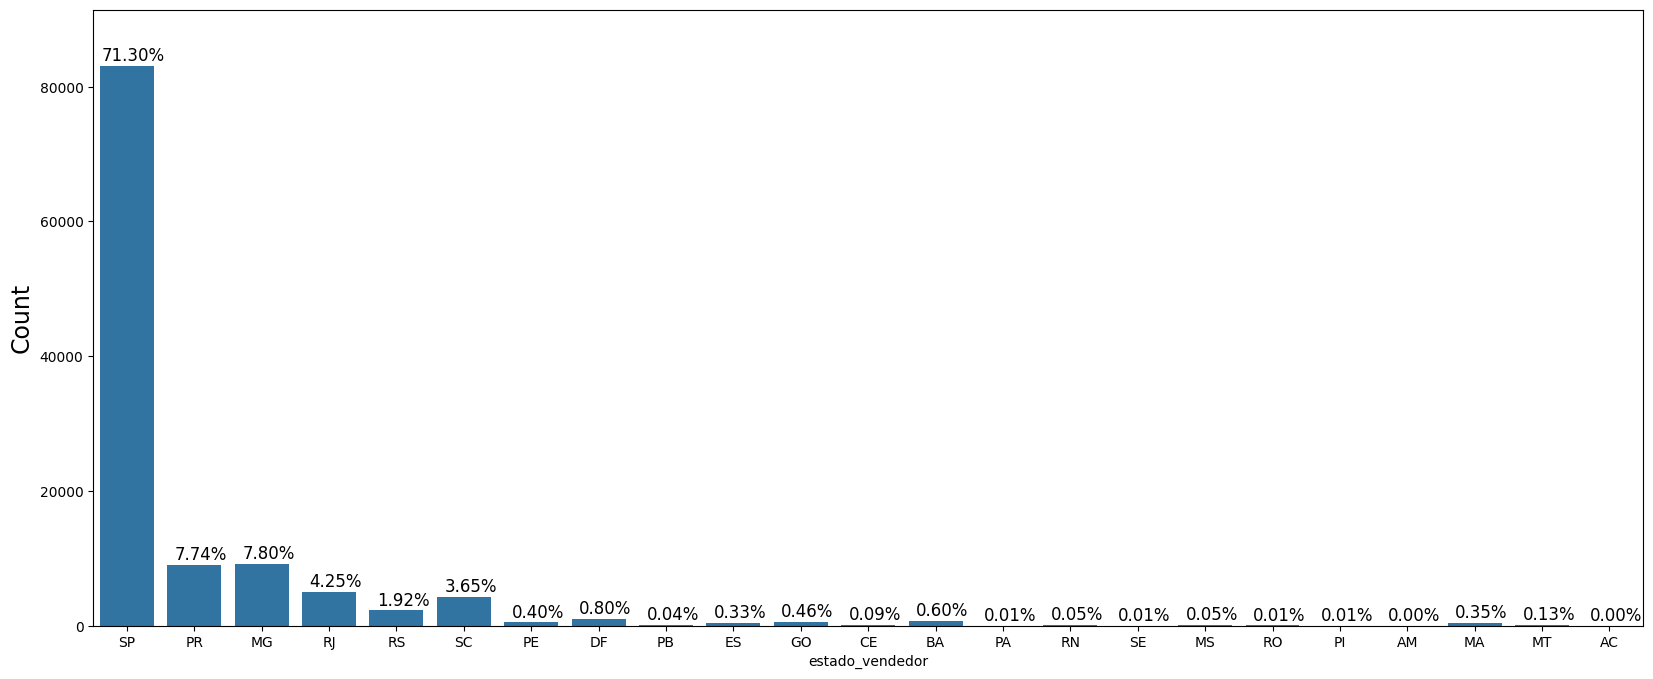

In [8]:
plot_perc('estado_vendedor',df)

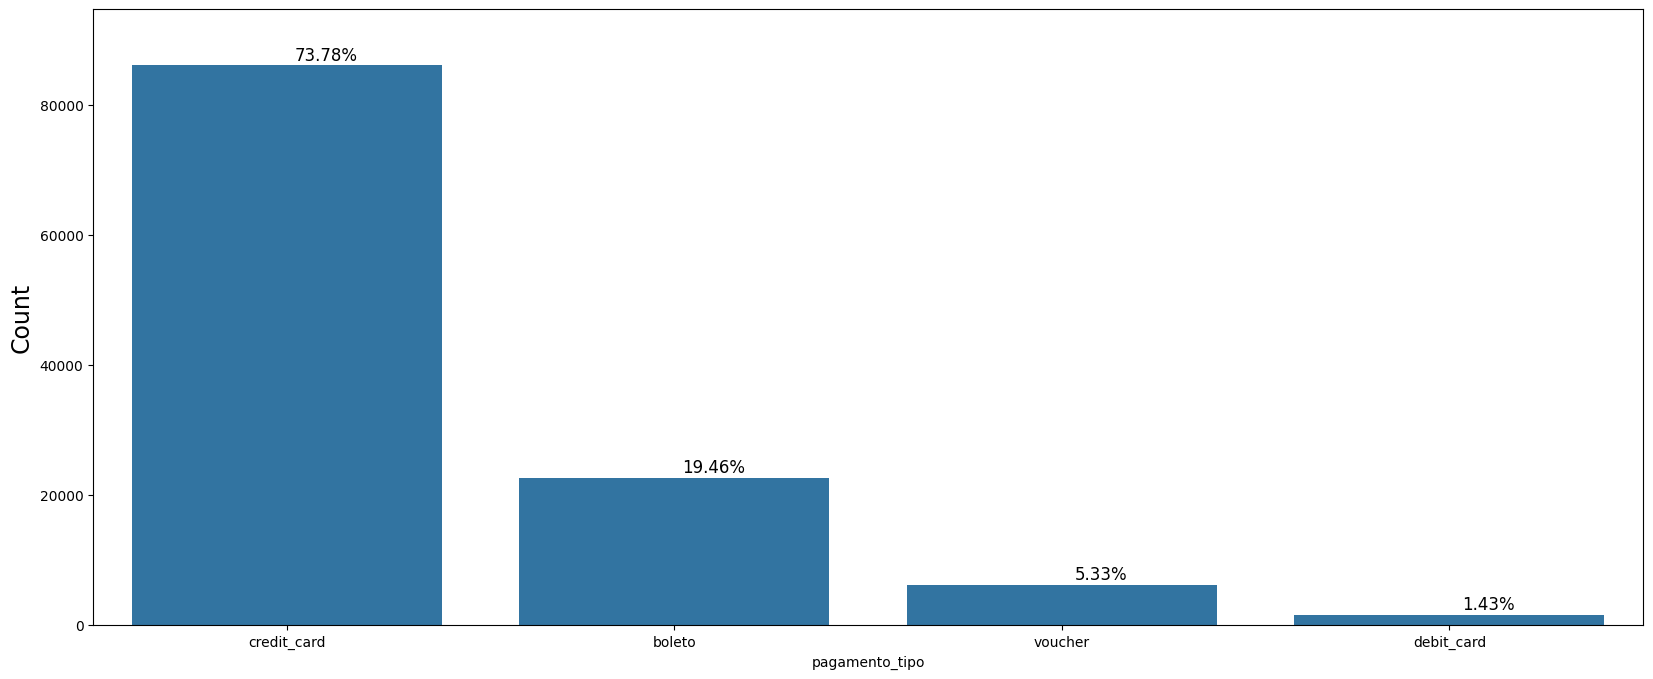

In [9]:
plot_perc('pagamento_tipo',df)

> ## Recency (R)
> #### How many days ago was this customer's last purchase?

> ## Frequency (F)
> #### How many purchases has this customer made with your company since they registered?

> ## Monetary Value (M)
> #### How much money has this customer spent with your company?

# Clustering

In [10]:
df_olist = df[['id_unico_cliente','id_cliente','horario_pedido','item_id','preco']]
df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [11]:
df_purchase  = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_purchase.columns = ['id_unico_cliente','DataMaxCompra']
df_purchase['DataMaxCompra'] = pd.to_datetime(df_purchase['DataMaxCompra'])
df_purchase.head()

,id_unico_cliente,DataMaxCompra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [12]:
df_purchase['Recency'] = (df_purchase['DataMaxCompra'].max() - df_purchase['DataMaxCompra']).dt.days
df_purchase.head()

,id_unico_cliente,DataMaxCompra,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [13]:
df_user = pd.merge(df_olist,df_purchase[['id_unico_cliente','Recency']],on='id_unico_cliente')
df_user.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [14]:
def calculate_wcss(data):
    wcss = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters']=kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

> Agora precisamos usar o Método Cotovelo, a ideia é rodar o KMeans para várias quantidades diferentes de clusters e dizer qual dessas quantidades é o número ótimo de clusters. Usando a "regra do cotovelo", identificamos que a partir de 4 clusters teremos bons resultados. Vou usar 5 apenas para garantir.

> O que geralmente acontece ao aumentar a quantidade de clusters no KMeans é que as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando. Então é preciso achar um equilíbrio em que as observações que formam cada agrupamento sejam o mais homogêneas possível e que os agrupamentos formados sejam o mais diferentes um dos outros.

In [15]:
from sklearn.cluster import KMeans

df_recency = df_user[['Recency']]
df_recency.head()

,Recency
0,474
1,298
2,298
3,483
4,211


In [16]:
sum_squares = calculate_wcss(df_recency)

C:\Users\guilh\AppData\Local\Temp\ipykernel_9460\2406314782.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters']=kmeans.labels_
C:\Users\guilh\AppData\Local\Temp\ipykernel_9460\2406314782.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters']=kmeans.labels_
C:\Users\guilh\AppData\Local\Temp\ipykernel_9460\2406314782.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

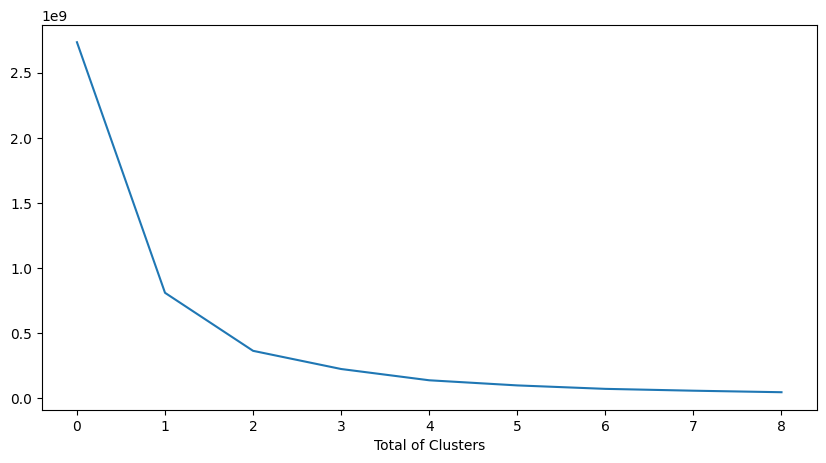

In [17]:
plt.figure(figsize=(10,5))
plt.plot(sum_squares)
plt.xlabel('Total of Clusters')
plt.show()

> But how can we identify whether the optimal number of clusters is 3, 4, or 5? There is a mathematical solution! First, we define a straight line connecting the first point (cluster 1) to the last point (cluster 9). Then, we calculate the distance from each point to the line using the following equation:

![](https://miro.medium.com/max/2775/1*9J7Wnh5L0eIcHXBeWlzvNA.png)

> In this case, $P0$  is the point for cluster 1 and $P1$ is the point for cluster 9. The pair $(x,y)$ represents the coordinates of any point for which we want to calculate the distance. By calculating all the distances, we can determine the ideal point!

### Optimal Number

In [18]:
import math

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss) - 1]
    
    distances = []
    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        denominator = math.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
        distances.append(numerator / denominator)
    return distances.index(max(distances)) + 2

In [19]:
n = optimal_number_of_clusters(sum_squares)
n

4

In [20]:
kmeans=KMeans(n_clusters=4)
df_user['ClusterRecency'] = kmeans.fit_predict(df_recency)
df_user.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recency,ClusterRecency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1


In [21]:
grouped_by_cluster = df_user.groupby('ClusterRecency')['Recency'].mean().reset_index()
grouped_by_cluster.head()

,ClusterRecency,Recency
0,0,490.622269
1,1,187.293338
2,2,319.957296
3,3,66.405850


In [22]:
grouped_by_cluster_sorted = grouped_by_cluster.sort_values(by='Recency',ascending=True).reset_index(drop=True)
grouped_by_cluster_sorted.head()

,ClusterRecency,Recency
0,3,66.405850
1,1,187.293338
2,2,319.957296
3,0,490.622269


In [23]:
grouped_by_cluster_sorted['index'] = grouped_by_cluster_sorted.index
grouped_by_cluster_sorted.head()

,ClusterRecency,Recency,index
0,3,66.405850,0
1,1,187.293338,1
2,2,319.957296,2
3,0,490.622269,3


In [24]:
merging_cluster = pd.merge(df_user,grouped_by_cluster_sorted[['ClusterRecency','index']],on='ClusterRecency')
merging_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recency,ClusterRecency,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,3
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,3
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1,1


In [25]:
removing_data = merging_cluster.drop(['ClusterRecency'],axis=1)
removing_data.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recency,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1


In [26]:
df_final = removing_data.rename(columns={'index':'ClusterRecency'})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recency,ClusterRecency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1


In [27]:
df_user.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recency,ClusterRecency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1


### Cluster Sorter

In [28]:
def cluster_sorter(cluster_name, target_name, df):
    # Group by cluster and calculate the mean of the target name
    grouped_by_cluster = df.groupby(cluster_name)[target_name].mean().reset_index()
    
    # Sort the grouped data by the target name in ascending order
    grouped_by_cluster_sorted = grouped_by_cluster.sort_values(by=target_name, ascending=True).reset_index(drop=True)
    
    # Add an index column to represent the sorted order
    grouped_by_cluster_sorted['index'] = grouped_by_cluster_sorted.index
    
    # Merge the sorted index back into the original dataframe
    merged_cluster = pd.merge(df, grouped_by_cluster_sorted[[cluster_name, 'index']], on=cluster_name)
    
    # Drop the original cluster column
    cleaned_data = merged_cluster.drop([cluster_name], axis=1)
    
    # Rename the 'index' column to the original cluster column name
    final_df = cleaned_data.rename(columns={'index': cluster_name})
    
    return final_df

In [29]:
df_user = cluster_sorter('ClusterRecency','Recency',df_user)

In [30]:
df_user.groupby('ClusterRecency')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
ClusterRecency,,,,,,,,
0,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0
1,33712.0,187.293338,35.169771,127.0,158.0,187.0,218.0,253.0
2,30957.0,319.957296,44.086874,254.0,281.0,313.0,357.0,405.0
3,20324.0,490.622269,59.293154,406.0,444.0,481.0,533.0,728.0


In [34]:
df_frequency = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequency.columns = ['id_unico_cliente','Frequency']
df_frequency.head()

,id_unico_cliente,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [35]:
df_user = pd.merge(df_user,df_frequency,on='id_unico_cliente')
df_user.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recency,ClusterRecency,Frequencia,Frequency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,1
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2,2,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2,2,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,1
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1,1,1


In [36]:
df_frequency = df_user[['Frequency']]
kmeans = KMeans(n_clusters=4)
df_user['ClusterFrequency'] = kmeans.fit_predict(df_frequency)
df_user.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recency,ClusterRecency,Frequencia,Frequency,ClusterFrequency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,1,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2,2,2,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2,2,2,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,1,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1,1,1,0


In [37]:
df_user.groupby('ClusterFrequency')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
ClusterFrequency,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
2,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
3,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0


In [38]:
df_user = cluster_sorter('ClusterFrequency','Frequency',df_user)

In [39]:
df_user.groupby('ClusterFrequency')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
ClusterFrequency,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
2,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [40]:
df_revenue = df.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()
df_revenue.columns = ['id_unico_cliente','Revenue']
df_user = pd.merge(df_user,df_revenue,on='id_unico_cliente')
df_user.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recency,ClusterRecency,Frequencia,Frequency,ClusterFrequency,Revenue
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,1,0,146.87
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2,2,2,0,551.58
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2,2,2,0,551.58
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,1,0,140.61
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1,1,1,0,137.58


In [41]:
df_payment = df_user[['Revenue']]
df_payment.head()

,Revenue
0,146.87
1,551.58
2,551.58
3,140.61
4,137.58


In [42]:
kmeans = KMeans(n_clusters=4)
df_user['ClusterRevenue'] = kmeans.fit_predict(df_payment)

In [43]:
df_user = cluster_sorter('ClusterRevenue','Revenue',df_user)

In [44]:
df_user.groupby('ClusterRevenue')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ClusterRevenue,,,,,,,,
0,114904.0,261.485763,377.283592,9.59,69.90,132.82,270.00,3080.96
1,1478.0,5900.843911,2894.129234,3083.40,3798.75,4875.25,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [45]:
df_user.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recency,ClusterRecency,Frequencia,Frequency,ClusterFrequency,Revenue,ClusterRevenue
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,1,0,146.87,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2,2,2,0,551.58,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2,2,2,0,551.58,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,1,0,140.61,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1,1,1,0,137.58,0


In [46]:
df_final = df_user[['id_unico_cliente','Recency','ClusterRecency','Frequency','ClusterFrequency','Revenue','ClusterRevenue']]
df_final.tail()

,id_unico_cliente,Recency,ClusterRecency,Frequency,ClusterFrequency,Revenue,ClusterRevenue
116576,c5da6424f1f5decedef8672a1a0103e1,12,0,1,0,314.32,0
116577,8d80e477643ec569b24592ce3d9dfc4c,41,0,2,0,169.26,0
116578,8d80e477643ec569b24592ce3d9dfc4c,41,0,2,0,169.26,0
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,36,0,1,0,77.50,0
116580,428f4721a509be8c52de6ec2900ba918,10,0,1,0,24.69,0


> We will calculate the customer's overall score based on these clusters and also define 4 categories: inactive, business, master, and premium.

### Clusters Categories

In [47]:
df_final['Score'] = df_user['ClusterRecency'] +df_user['ClusterFrequency']+df_user['ClusterRevenue']

C:\Users\guilh\AppData\Local\Temp\ipykernel_9460\3954581883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Score'] = df_user['ClusterRecency'] +df_user['ClusterFrequency']+df_user['ClusterRevenue']


In [48]:
df_final.head()

,id_unico_cliente,Recency,ClusterRecency,Frequency,ClusterFrequency,Revenue,ClusterRevenue,Score
0,861eff4711a542e4b93843c6dd7febb0,474,3,1,0,146.87,0,3
1,9eae34bbd3a474ec5d07949ca7de67c0,298,2,2,0,551.58,0,2
2,9eae34bbd3a474ec5d07949ca7de67c0,298,2,2,0,551.58,0,2
3,3c799d181c34d51f6d44bbbc563024db,483,3,1,0,140.61,0,3
4,23397e992b09769faf5e66f9e171a241,211,1,1,0,137.58,0,1


In [49]:
df_final.Score.max()

6

In [50]:
df_final['Segment'] = 'Inactive'
df_final.loc[df_final['Score'] >= 1, 'Segment'] = 'Business'
df_final.loc[df_final['Score'] >= 3, 'Segment'] = 'Master'
df_final.loc[df_final['Score'] >= 5, 'Segment'] = 'Premium'

C:\Users\guilh\AppData\Local\Temp\ipykernel_9460\960872912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Segment'] = 'Inactive'


In [51]:
df_final.to_csv('RFM.csv')

# Final Results

In [52]:
def plot_segment(x,y,data):
    sns.set(palette='muted',color_codes=True,style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x,y=y,hue='Segment',data=data,size='Segment',sizes=(50,150),size_order=['Premium','Master','Business','Inactive'])
    plt.show()

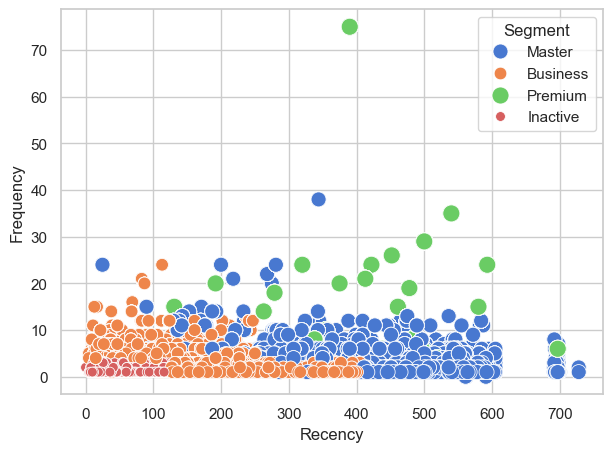

In [53]:
plot_segment('Recency','Frequency',df_final)

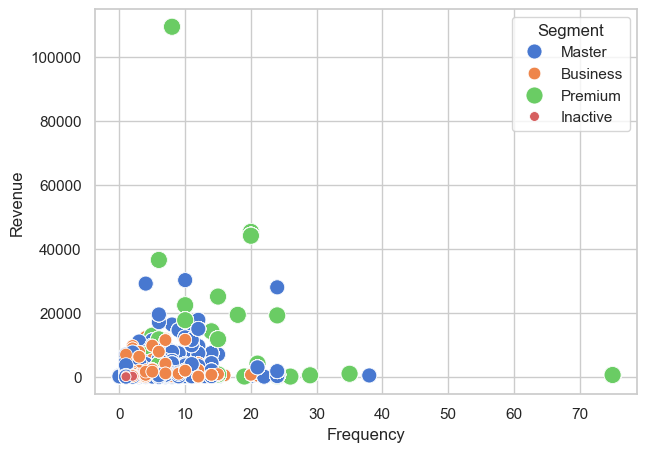

In [54]:
plot_segment('Frequency','Revenue',df_final)

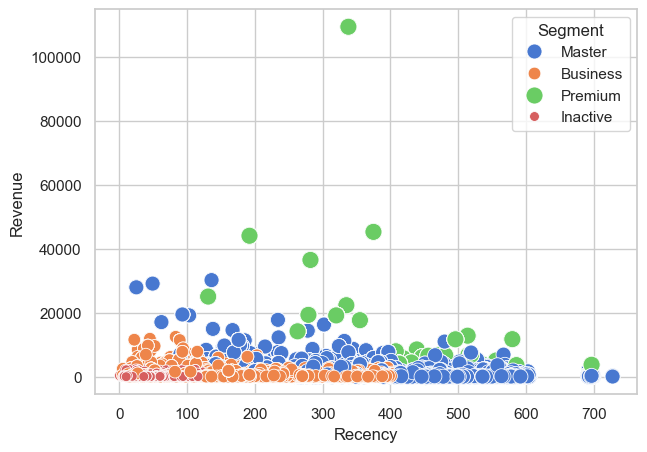

In [55]:
plot_segment('Recency','Revenue',df_final)

<Axes: xlabel='count', ylabel='Segment'>

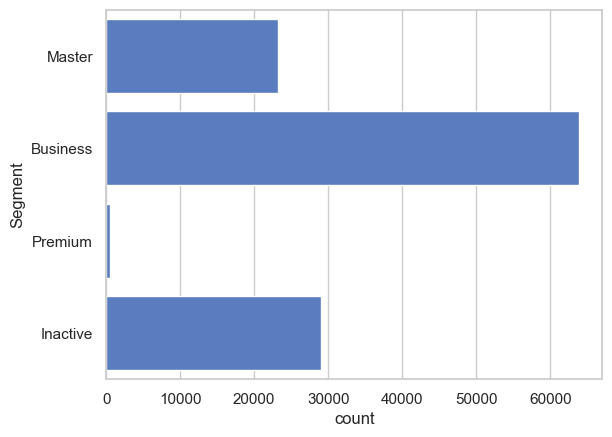

In [56]:
sns.countplot(df_final['Segment'])

Finally, I was able to divide customers based on their behavior. I can also create other types of segmentation based on the marketing campaigns I want to explore. It’s important to note that this is just one of many clustering methods, and there are other types of algorithms and separations we can perform. In this case, I performed clustering based on scores, meaning customers who spend a lot but make purchases less frequently may end up with a score similar to those who spend less but purchase more frequently. To perform a more comprehensive analysis, we could create an entire table based on a score from 1 to 5, as in the example below:

| **Segments**          | **Description**                                                   | **Recency** | **Frequency** | **Revenue** |
|-----------------------|-------------------------------------------------------------------|-------------|---------------|-------------|
| Champions             | Bought recently, buy frequently, and spend a lot                 | 4-5         | 4-5           | 4-5         |
| Loyal Customers       | Spend a lot and respond to promotions                            | 2-5         | 3-5           | 3-5         |
| Potential Loyalists   | Bought recently, more than once, and spent a good amount         | 3-5         | 1-3           | 1-3         |
| New Customers         | Bought recently but don’t buy frequently                         | 4-5         | <=1           | <=1         |
| Promising             | Bought recently but didn’t spend much                            | 3-4         | <=1           | <=1         |
| Need Attention        | Recency, frequency, and monetary value above average             | 2-3         | 2-3           | 2-3         |
| Almost At Risk        | Recency, frequency, and monetary value below average             | 2-3         | <=2           | <=2         |
| At Risk               | Spent a lot, bought many times, but a long time ago              | <=2         | 2-5           | 2-5         |
| Can’t Lose Them       | Spent a lot and bought frequently, but a long time ago           | <=1         | 4-5           | 4-5         |
| Hibernating           | Spent little, with low frequency, and a long time ago            | 1-2         | 1-2           | 1-2         |
| Lost                  | Low recency, frequency, and monetary value                       | <=2         | <=2           | <=2         |